# Bolt Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bolt_data = pd.read_excel("Bolt_dataset.xlsx")

In [3]:
bolt_data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [4]:
# Missing upfront_price values count
bolt_data["upfront_price"].isnull().sum()

1534

In [5]:
bolt_data[bolt_data["upfront_price"].isnull()].head(10)

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
8,1904,1904,2020-02-20 16:38:34,13600.50,NaN,9540,1917,1,client,finished,...,NaN,CA.5.40,finished,finished,DA.4.31,605,TECNO K7,0,0,NaN
11,2803,2803,2020-02-29 01:44:16,18.80,NaN,17107,1552,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1695,LENOVO Lenovo TB-7304F,1,0,-100.0
12,3313,3313,2020-03-06 00:29:03,31.23,NaN,54757,6581,1,driver,finished,...,NaN,CI.4.19,finished,finished,DA.4.39,1459,Samsung SM-G950F,1,0,-58.0
14,3675,3675,2020-03-09 10:50:57,8.53,NaN,11456,1205,1,driver,finished,...,NaN,CI.4.19,finished,finished,DA.4.42,629,Samsung SM-J610FN,1,0,-498.0
15,3638,3638,2020-03-08 21:01:19,13643.28,NaN,10365,1533,1,client,finished,...,NaN,CI.4.19,finished,finished,DA.4.39,1968,TECNO MOBILE LIMITED TECNO CC7,0,0,NaN
18,73,73,2020-02-02 14:46:22,15.67,NaN,22396,2237,1,client,finished,...,NaN,CA.5.40,finished,finished,DA.4.37,2110,Samsung SM-G965F,1,0,-160.0
19,91,91,2020-02-02 17:29:02,2.97,NaN,1754,491,1,driver,finished,...,NaN,CA.5.42,finished,finished,DA.4.37,1784,Samsung SM-G398FN,1,0,0.0
24,1825,1825,2020-02-19 19:05:31,12329.22,NaN,8063,1950,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.34,587,Samsung SM-T815Y,0,1,NaN
30,2439,2439,2020-02-25 07:40:09,14863.50,NaN,9657,2547,0,client,finished,...,NaN,CA.5.44,finished,finished,DA.4.39,2009,INFINIX MOBILITY LIMITED Infinix X606C,0,0,NaN


**No clear pattern as to why certain upfront_price values are missing. Let's ignore the data which has missing upfront_price values and continue with our analysis.**

In [6]:
has_upfront_price = bolt_data[~bolt_data["upfront_price"].isnull()] 
len(has_upfront_price)

3409

**So, 3,409 entries out of 4,943 have a upfront_price in the given data**.

## Calculating Correct upfront_price Predictions

Let's now calculate how many of the 3,409 upfront_price predictions are within the 20% tolerance level.

In [7]:
low_upfront_boolean = has_upfront_price["upfront_price"] < 0.80*(has_upfront_price["metered_price"])
high_upfront_boolean = has_upfront_price["upfront_price"] > 1.20*(has_upfront_price["metered_price"])

In [8]:
correct_predictions = has_upfront_price[~((low_upfront_boolean) | ((high_upfront_boolean)))]

In [9]:
f"{len(correct_predictions)} accurate predictions out of {len(has_upfront_price)} total predictions made. {len(correct_predictions)/len(has_upfront_price)*100:.2f} % correct predictions"

'2051 accurate predictions out of 3409 total predictions made. 60.16 % correct predictions'

# Finding correlations b/w upfront_price and other variables

**Let's now try to visualize the correlations of upfront_price and metered_price with other variables in the data.**

In [10]:
correlations = has_upfront_price.corr()
upfront_price_correlations = correlations[["upfront_price","metered_price"]]

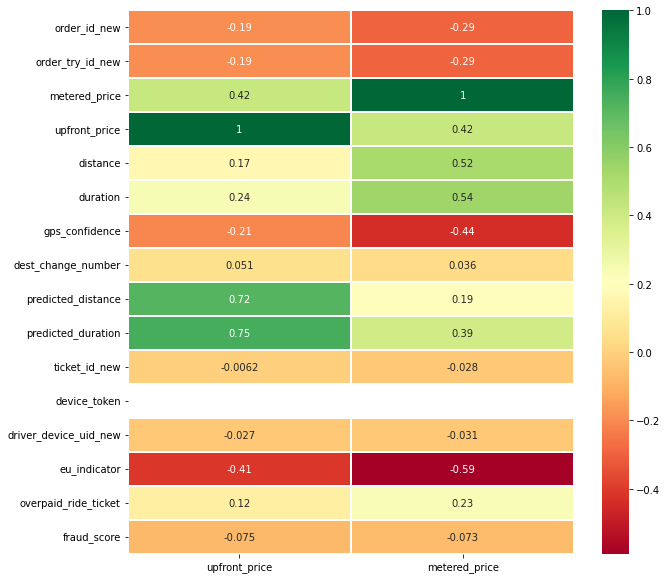

In [11]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(upfront_price_correlations, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.show()

**As expected, above heatmap shows that upfront_price has a strong positive correlation with predicted_distance and predicted_duration. This also means that only about 70% of the change in upfront_price is explained by predicted_distance and predicted_duration. This seems low as these are the only two variables that should mainly be deciding the upfront_price. Let's see if we can find scenarios in which the extent of this correlation increases.** 

In [32]:
eu_rides = has_upfront_price[has_upfront_price["eu_indicator"]==1]
eu_rides_correlations = eu_rides.corr()
eu_rides_upfront_price_correlations=  eu_rides_correlations[["upfront_price","metered_price"]]

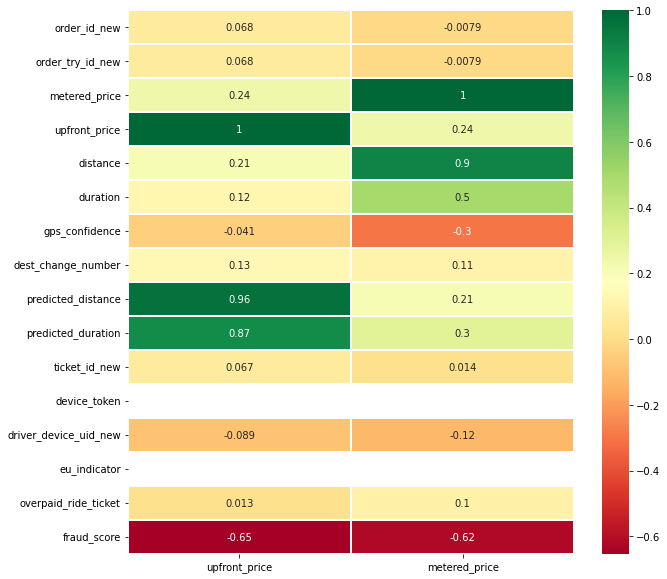

In [31]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(eu_rides_upfront_price_correlations, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.show()

**The above heatmap clearly shows that the extent of relationship between upfront_price and predicted_distance and predicted_duration goes upto almost 90% when the rides have been filtered to include only the ones made in the EU region. This is understanable as well given that there must be a mathematical formula relating predicted_distance and predicted_duration with the upfront_price. That fomula must have a constant representing the unit price in a given currency. Since rides made in different regions can have different currencies, the one-fits all relationship cannot work with a data coming from different regions of the world. Hence, the best way to increase the precison of upfront_price calculation is by avoiding using one formula on a data that is coming from different currency regions.**

## Histogram of `eu_indicator` in Correct versus Incorrect Predictions

In [14]:
incorrect_predictions = has_upfront_price[(low_upfront_boolean) | (high_upfront_boolean)]
len(incorrect_predictions)

1358

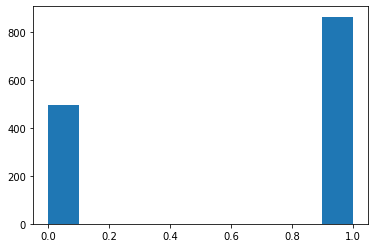

In [15]:
plt.hist(incorrect_predictions["eu_indicator"])
plt.show()

In [16]:
incorrect_predictions["eu_indicator"].value_counts(dropna=False)

1    864
0    494
Name: eu_indicator, dtype: int64

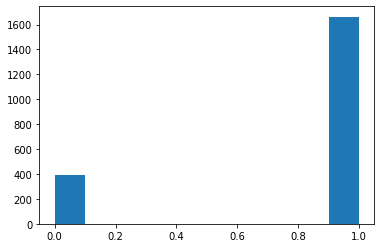

In [17]:
plt.hist(correct_predictions["eu_indicator"])
plt.show()

In [26]:
correct_predictions["eu_indicator"].value_counts(dropna=False)

1    1663
0     388
Name: eu_indicator, dtype: int64

**It can be seen from the above histograms and value counts that incorrect predictions are made the most when the data has greater mixed representation of more than one region. This validates the above findings of heatmaps as well.**

# GPS_Confidence Analysis

In [44]:
correct_predictions["gps_confidence"].value_counts()/len(correct_predictions)*100

1    94.490492
0     5.509508
Name: gps_confidence, dtype: float64

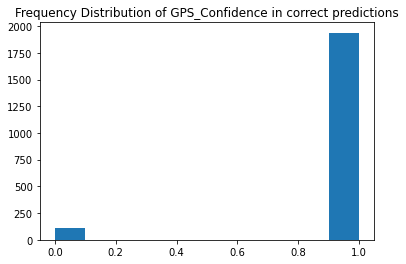

In [61]:
plt.hist(correct_predictions["gps_confidence"])
plt.title("Frequency Distribution of GPS_Confidence in correct predictions")
plt.show()

In [39]:
incorrect_predictions["gps_confidence"].value_counts()/len(correct_predictions)*100

1    53.583618
0    12.627986
Name: gps_confidence, dtype: float64

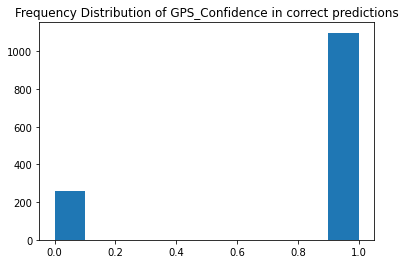

In [60]:
plt.hist(incorrect_predictions["gps_confidence"])
plt.title("Frequency Distribution of GPS_Confidence in correct predictions")
plt.show()

**The above value count analysis and histograms show that almost 13% of inaccurate predictions had 0 gps_confidence as compared with 5.5% of the cases in accurate predictions. This confirms that the gps_confidence has to be there to get better upfront_price predictions.**

### The above analysis shows that to increase `upfront_price` calculation accuracy:
1. Price calculation forumlas must be region-sensitive to incorporate underlaying currency changes from one region to the other
2. `gps_confidence` must be there otherwise users must be prompted about the possibility of inaccuracy in the `upfront_price`